In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv("Tweets.csv")
df[['airline_sentiment_confidence','negativereason','negativereason_confidence','text']].dropna()

,airline_sentiment_confidence,negativereason,negativereason_confidence,text
3,1.0000,Bad Flight,0.7033,@VirginAmerica it's really aggressive to blast...
4,1.0000,Can't Tell,1.0000,@VirginAmerica and it's a really big bad thing...
5,1.0000,Can't Tell,0.6842,@VirginAmerica seriously would pay $30 a fligh...
15,0.6842,Late Flight,0.3684,@VirginAmerica SFO-PDX schedule is still MIA.
17,1.0000,Bad Flight,1.0000,@VirginAmerica I flew from NYC to SFO last we...
...,...,...,...,...
14631,1.0000,Bad Flight,1.0000,@AmericanAir thx for nothing on getting us out...
14633,1.0000,Cancelled Flight,1.0000,@AmericanAir my flight was Cancelled Flightled...
14634,0.6684,Late Flight,0.6684,@AmericanAir right on cue with the delays👌
14636,1.0000,Customer Service Issue,1.0000,@AmericanAir leaving over 20 minutes Late Flig...


In [64]:
x = df[['airline_sentiment_confidence', 'negativereason_confidence']]
y = df["airline_sentiment"]

In [65]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(y)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [67]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
muestra = x_test.iloc[0].to_numpy().reshape(1, -1)
y_pred = model.predict(muestra)
print(f"real: \n {y_test} \n prediccion \n {y_pred}")

real: 
 4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
11765    negative
14156    negative
10963     neutral
4877      neutral
5206     negative
Name: airline_sentiment, Length: 2928, dtype: object 
 prediccion 
 ['neutral']


/home/juann/projects/ScikitLearn/.venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [69]:
y_pred2 = model.predict(x_test)
print(f" predicciones: \n {y_pred2} \n etiquetas reales: \n {y_test}")

 predicciones: 
 ['neutral' 'negative' 'negative' ... 'neutral' 'neutral' 'negative'] 
 etiquetas reales: 
 4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
11765    negative
14156    negative
10963     neutral
4877      neutral
5206     negative
Name: airline_sentiment, Length: 2928, dtype: object


In [ ]:
metrics = accuracy_score(y_test, y_pred2)
report = classification_report(y_test,y_pred2)
print(f"Metricas del modelo \n {metrics} \n Reporte de clasificacion \n {report}")

Metricas del modelo 
 0.8346994535519126 
 Reporte de clasificacion 
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1889
     neutral       0.55      0.88      0.68       580
    positive       0.39      0.10      0.15       459

    accuracy                           0.83      2928
   macro avg       0.65      0.66      0.61      2928
weighted avg       0.82      0.83      0.80      2928



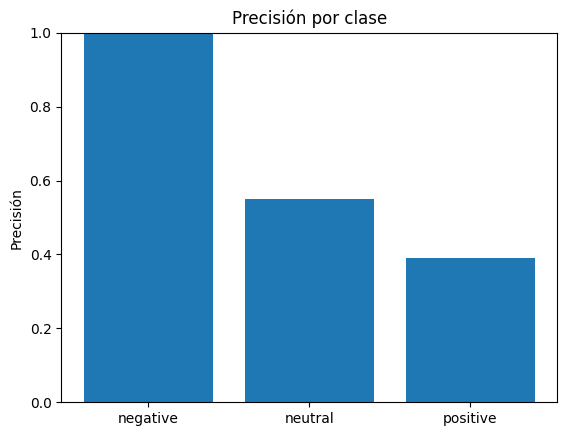

In [82]:
classs, accu = [], []
for linea in report.split('\n'):
    partes = linea.split()
    if len(partes) > 4 and partes[1].replace('.','',1).isdigit():
        classs.append(partes[0])
        accu.append(float(partes[1]))
plt.bar(classs, accu)
plt.ylim(0,1)
plt.ylabel('Precisión')
plt.title('Precisión por clase')
plt.show()